In [1]:
import os

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import keras
import imutils
import cv2
import h5py
import matplotlib
import random

from scipy import ndimage, misc
from sklearn.model_selection import train_test_split
from sklearn import metrics

Using TensorFlow backend.


## Load the U-Net and weights

In [2]:
U_net = tf.keras.models.load_model('U_net_v01')

In [3]:
U_net.load_weights("U_net_v01.h5")

## Evaluate the model

In [4]:
test_images = np.load("images_test.npy")
test_images = test_images[..., np.newaxis]

In [6]:
test_labels_pred = U_net.predict(test_images)

In [19]:
np.save("test_labels_pred", test_labels_pred)

## Get scores

In [9]:
test_labels = np.load("labels_test.npy")
test_labels_pred = np.load("test_labels_pred.npy")
test_labels_pred = np.squeeze(test_labels_pred)

In [66]:
np.amax(test_labels)

2

In [54]:
inds0=np.where(test_labels[55]==0)
inds1=np.where(test_labels[55]==1)
inds2=np.where(test_labels[55]==2)

In [55]:
test_labels_pred[55][inds0]

array([0.00309196, 0.00150759, 0.00242889, ..., 0.00251415, 0.00533114,
       0.00327234], dtype=float32)

In [56]:
test_labels_pred[55][inds1]

array([0.02699511, 0.02718737, 0.02976978, ..., 0.58562136, 0.6072808 ,
       0.6474415 ], dtype=float32)

In [57]:
test_labels_pred[55][inds2]

array([0.4928107 , 0.4664093 , 0.44541484, ..., 1.        , 1.        ,
       1.        ], dtype=float32)

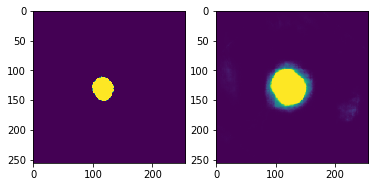

In [67]:
plt.subplot(1,2,1)
plt.imshow(test_labels[6])
plt.subplot(1,2,2)
plt.imshow(test_labels_pred[6])

In [5]:
def get_scores(y_true, y_pred):
    results=[]
    y_true=y_true.flatten()
    y_pred=y_pred.flatten()
    #Overall precision
    results.append(metrics.precision_score(y_true, y_pred, average='micro'))
    #Per-class precision
    results.append(metrics.precision_score(y_true, y_pred, average='macro'))
    #jaccard (right average?)
    results.append(metrics.jaccard_score(y_true, y_pred, average='macro'))
    return results
get_scores(test_labels,test_labels_pred)

MemoryError: Unable to allocate 4.11 GiB for an array with shape (1103626240,) and data type int32